In [55]:
import itertools
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [76]:
from far_heaa.grids_and_combinations.grid_creation import CompositionGrid


mol_grid = CompositionGrid().create_mol_grid(3, 15)


def smix(mol):
    return -8.314e-5*np.sum(mol*np.log(mol+1e-9))

def hmix(omegas, mol):
    mol_pair = np.array(list(itertools.combinations(mol, 2)))
    mol_pair = mol_pair[:, 1]*mol_pair[:,0]
    h_sum = np.sum(omegas*mol_pair)
    return h_sum

In [77]:
def gmix(hmix, smix, temp):
    return hmix - temp*smix

In [129]:
omegas = np.array([.10, .20, .10])

s_mix = []
h_mix = []
for mol in mol_grid:
    s_mix.append(smix(mol))
    h_mix.append(hmix(omegas, mol))

s_mix = np.array(s_mix)
h_mix = np.array(h_mix)

In [156]:
temp = np.linspace(0, 3000, 20)
g_mix = gmix(h_mix, s_mix, temp[0])
g_mix2 = gmix(h_mix, s_mix, temp[3])

In [157]:
g_mix - g_mix2

array([-3.93821085e-11,  1.01308634e-02,  1.61542678e-02,  2.04628788e-02,
        2.35606003e-02,  2.56665532e-02,  2.68946824e-02,  2.72975951e-02,
        2.68946824e-02,  2.56665532e-02,  2.35606003e-02,  2.04628788e-02,
        1.61542678e-02,  1.01308634e-02, -3.93821085e-11,  1.01308634e-02,
        2.00486390e-02,  2.58338839e-02,  2.98866140e-02,  3.27027954e-02,
        3.44975521e-02,  3.53712008e-02,  3.53712008e-02,  3.44975521e-02,
        3.27027954e-02,  2.98866140e-02,  2.58338839e-02,  2.00486390e-02,
        1.01308634e-02,  1.61542678e-02,  2.58338839e-02,  3.13632479e-02,
        3.51344379e-02,  3.76394231e-02,  3.90796992e-02,  3.95504352e-02,
        3.90796992e-02,  3.76394231e-02,  3.51344379e-02,  3.13632479e-02,
        2.58338839e-02,  1.61542678e-02,  2.04628788e-02,  2.98866140e-02,
        3.51344379e-02,  3.85944317e-02,  4.07449364e-02,  4.17822997e-02,
        4.17822997e-02,  4.07449364e-02,  3.85944317e-02,  3.51344379e-02,
        2.98866140e-02,  

In [158]:
g_mix_chose = g_mix2
print(g_mix_chose.shape)
t, l, r = mol_grid[:, 0], mol_grid[:, 1], mol_grid[:, 2]

plot_df = pd.DataFrame({f"t": t, f"l": l, f"r": r})
plot_df['G_mix'] = g_mix_chose
plot = px.scatter_ternary(
	plot_df,
	a=f"t",
	b=f"l",
	c=f"r",
	color='G_mix',  # Remove color scale for hiding the colorbar # Use hexagon shape
	size_max=15,
    color_continuous_midpoint=0, 
	color_continuous_scale="rdbu_r"# Increase marker size
)
plot.show()
# # Customize layout
# plot.update_layout(
#     ternary=dict(
#         aaxis_title=str(omegas[0]),
#         baxis_title=str(omegas[1]),
#         caxis_title=str(omegas[2])
#     ),
#     coloraxis_showscale=True,  # Show color scale
#     title="Ternary Scatter Plot with Custom Axis Labels"
# )

(121,)


In [190]:
from far_heaa.io.text_handler import TextHandler

element_list = TextHandler.extract_ele_list('../database', file_name='database_element_list')
print(element_list)

['Ag', 'Al', 'As', 'Au', 'Bi', 'Cd', 'Co', 'Cr', 'Cu', 'Fe', 'Ga', 'Ge', 'Hf', 'Hg', 'In', 'Ir', 'Mg', 'Mn', 'Mo', 'Nb', 'Ni', 'Os', 'Pb', 'Pd', 'Pt', 'Re', 'Rh', 'Ru', 'Sb', 'Sc', 'Si', 'Sn', 'Ta', 'Te', 'Ti', 'V', 'W', 'Y', 'Zn', 'Zr']


In [232]:
from far_heaa.io.json_handler import JSONHandler

binaries = JSONHandler.load_json("../database", file_name='bokas_omegas_processed')
binaries = {k: v['FCC'] for k, v, in binaries.items()}

In [233]:
from far_heaa.grids_and_combinations.combination_generation import MultinaryCombinations

ternaries = list(MultinaryCombinations.create_multinary(element_list, no_comb=[3]).values())[0]

In [234]:
print(ternaries)

['Ag-Al-As', 'Ag-Al-Au', 'Ag-Al-Bi', 'Ag-Al-Cd', 'Ag-Al-Co', 'Ag-Al-Cr', 'Ag-Al-Cu', 'Ag-Al-Fe', 'Ag-Al-Ga', 'Ag-Al-Ge', 'Ag-Al-Hf', 'Ag-Al-Hg', 'Ag-Al-In', 'Ag-Al-Ir', 'Ag-Al-Mg', 'Ag-Al-Mn', 'Ag-Al-Mo', 'Ag-Al-Nb', 'Ag-Al-Ni', 'Ag-Al-Os', 'Ag-Al-Pb', 'Ag-Al-Pd', 'Ag-Al-Pt', 'Ag-Al-Re', 'Ag-Al-Rh', 'Ag-Al-Ru', 'Ag-Al-Sb', 'Ag-Al-Sc', 'Ag-Al-Si', 'Ag-Al-Sn', 'Ag-Al-Ta', 'Ag-Al-Te', 'Ag-Al-Ti', 'Ag-Al-V', 'Ag-Al-W', 'Ag-Al-Y', 'Ag-Al-Zn', 'Ag-Al-Zr', 'Ag-As-Au', 'Ag-As-Bi', 'Ag-As-Cd', 'Ag-As-Co', 'Ag-As-Cr', 'Ag-As-Cu', 'Ag-As-Fe', 'Ag-As-Ga', 'Ag-As-Ge', 'Ag-As-Hf', 'Ag-As-Hg', 'Ag-As-In', 'Ag-As-Ir', 'Ag-As-Mg', 'Ag-As-Mn', 'Ag-As-Mo', 'Ag-As-Nb', 'Ag-As-Ni', 'Ag-As-Os', 'Ag-As-Pb', 'Ag-As-Pd', 'Ag-As-Pt', 'Ag-As-Re', 'Ag-As-Rh', 'Ag-As-Ru', 'Ag-As-Sb', 'Ag-As-Sc', 'Ag-As-Si', 'Ag-As-Sn', 'Ag-As-Ta', 'Ag-As-Te', 'Ag-As-Ti', 'Ag-As-V', 'Ag-As-W', 'Ag-As-Y', 'Ag-As-Zn', 'Ag-As-Zr', 'Ag-Au-Bi', 'Ag-Au-Cd', 'Ag-Au-Co', 'Ag-Au-Cr', 'Ag-Au-Cu', 'Ag-Au-Fe', 'Ag-Au-Ga', 'Ag-Au-Ge', 'Ag-Au-Hf

In [235]:
omegas = np.zeros((len(ternaries), 3))
for idx, i in enumerate(ternaries):
    binary = [binaries[j] for j in list(MultinaryCombinations.create_multinary(i.split('-'), no_comb=[2]).values())[0]]
    omegas[idx] = binary

omegas = np.sum(np.sign(omegas), axis = 1)

In [236]:
omegas.shape

(9880,)

In [237]:
plus_plus_plus = np.round(len(np.where(omegas == 3)[0]), 3)*100
minus_minus_minus = np.round(len(np.where(omegas == -3)[0]), 3)*100
minus_minus_plus = np.round(len(np.where(omegas == -1)[0]), 3)*100
plus_minus_plus = np.round(len(np.where(omegas == 1)[0]),3)*100

print('+++: ', plus_plus_plus/9880,
      '---: ', minus_minus_minus/9880,
      '+-+: ', plus_minus_plus/9880,
      '--+: ', minus_minus_plus/9880)

+++:  9.119433198380566 ---:  26.10323886639676 +-+:  29.402834008097166 --+:  35.374493927125506


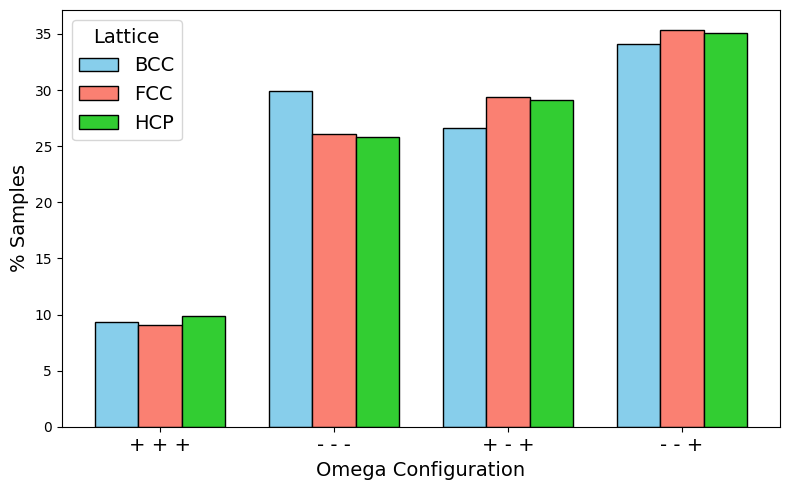

In [245]:
BCC = [9.31, 29.89, 26.65, 34.12]
HCP = [9.88, 25.86, 29.16, 35.1]
FCC = [9.11, 26.10, 29.40, 35.37]
x_labels = ['+ + +', '- - -', '+ - +', '- - +']
bar_width = 0.25
x = np.arange(len(x_labels))

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

# Bars for each structure
ax.bar(x - bar_width, BCC, width=bar_width, label='BCC', color='skyblue', edgecolor='black')
ax.bar(x, FCC, width=bar_width, label='FCC', color='salmon', edgecolor='black')
ax.bar(x + bar_width, HCP, width=bar_width, label='HCP', color='limegreen', edgecolor='black')

# Customize the plot
ax.set_xlabel('Omega Configuration', fontsize=14)
ax.set_ylabel('% Samples', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=14)
ax.legend(title="Lattice", fontsize=14, title_fontsize=14)

plt.tight_layout()

plt.show()